# Cars brand prediction using decision tree classification

**Importing libraires:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


**Collecting the datasets:**

In [21]:
data = pd.read_csv('cars.csv') 

In [26]:
print(data.head())


    mpg   cylinders  cubicinches   hp  weightlbs   time-to-60   year     brand
0  14.0           8          350  165       4209           12   1972       US.
1  31.9           4           89   71       1925           14   1980   Europe.
2  17.0           8          302  140       3449           11   1971       US.
3  15.0           8          400  150       3761           10   1971       US.
4  30.5           4           98   63       2051           17   1978       US.


**Preprocess the dataset:**

In [27]:
data = data.dropna()
X = data.drop(' brand', axis=1)  
y = data[' brand']
X = pd.get_dummies(X, drop_first=True)


**Splitting the datasets:**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (182, 318)
Test set size: (79, 318)


**Build the Decision Tree Model:**

In [34]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print(f"Tree Depth: {dt_model.get_depth()}")
print(f"Number of Leaves: {dt_model.get_n_leaves()}")


Tree Depth: 11
Number of Leaves: 32


**Evaluate the Model:**

In [35]:
y_pred = dt_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

     Europe.       0.47      0.53      0.50        15
      Japan.       0.91      0.40      0.56        25
         US.       0.71      0.92      0.80        39

    accuracy                           0.68        79
   macro avg       0.70      0.62      0.62        79
weighted avg       0.73      0.68      0.67        79


Confusion Matrix:
[[ 8  1  6]
 [ 6 10  9]
 [ 3  0 36]]


**Visualize the Decision Tree:**

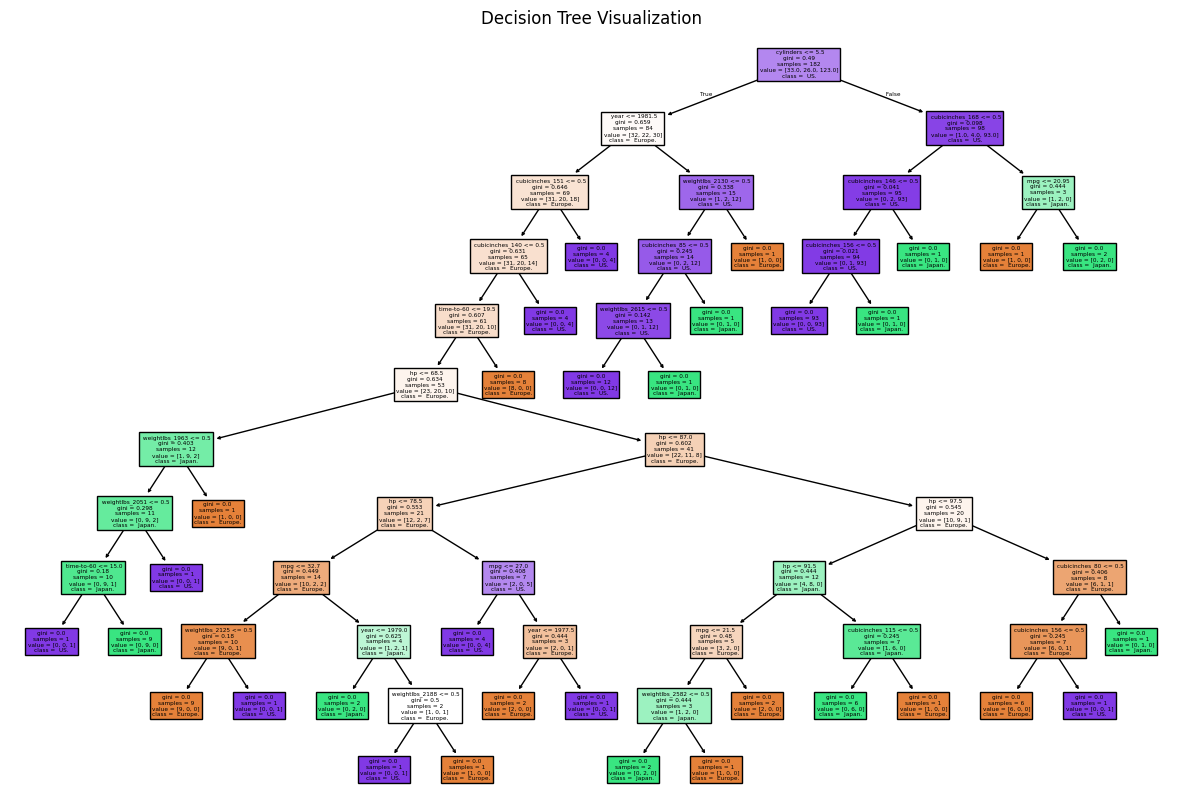

In [33]:
# Ensure feature names and class names are in the correct format
feature_names = X.columns.tolist()
class_names = [str(label) for label in set(y)]

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()
